In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
raw_data = pd.read_csv('./datasets/samsung202401.csv')
print(raw_data.head())
raw_data.info()

         Date    Open    High     Low   Close    Adj Close    Volume
0  2000-01-04  6000.0  6110.0  5660.0  6110.0  4514.580566  74195000
1  2000-01-05  5800.0  6060.0  5520.0  5580.0  4122.972168  74680000
2  2000-01-06  5750.0  5780.0  5580.0  5620.0  4152.527832  54390000
3  2000-01-07  5560.0  5670.0  5360.0  5540.0  4093.417969  40305000
4  2000-01-10  5600.0  5770.0  5580.0  5770.0  4263.360840  46880000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6033 entries, 0 to 6032
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6033 non-null   object 
 1   Open       6033 non-null   float64
 2   High       6033 non-null   float64
 3   Low        6033 non-null   float64
 4   Close      6033 non-null   float64
 5   Adj Close  6033 non-null   float64
 6   Volume     6033 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 330.1+ KB


In [3]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'])     #date의 타입을 datetime으로 바꿔주기
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6033 entries, 0 to 6032
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6033 non-null   datetime64[ns]
 1   Open       6033 non-null   float64       
 2   High       6033 non-null   float64       
 3   Low        6033 non-null   float64       
 4   Close      6033 non-null   float64       
 5   Adj Close  6033 non-null   float64       
 6   Volume     6033 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 330.1 KB


In [4]:
raw_data.set_index('Date',inplace=True)     #index를 바꿔준다
print(raw_data)

               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2000-01-04   6000.0   6110.0   5660.0   6110.0   4514.580566  74195000
2000-01-05   5800.0   6060.0   5520.0   5580.0   4122.972168  74680000
2000-01-06   5750.0   5780.0   5580.0   5620.0   4152.527832  54390000
2000-01-07   5560.0   5670.0   5360.0   5540.0   4093.417969  40305000
2000-01-10   5600.0   5770.0   5580.0   5770.0   4263.360840  46880000
...             ...      ...      ...      ...           ...       ...
2024-01-17  73100.0  73300.0  71000.0  71000.0  71000.000000  22683660
2024-01-18  71600.0  72000.0  70700.0  71700.0  71700.000000  17853397
2024-01-19  73500.0  74700.0  73000.0  74700.0  74700.000000  23363427
2024-01-22  75900.0  76000.0  75000.0  75100.0  75100.000000  19673375
2024-01-23  75700.0  75800.0  74500.0  74900.0  74900.000000   4686897

[6033 rows x 6 columns]


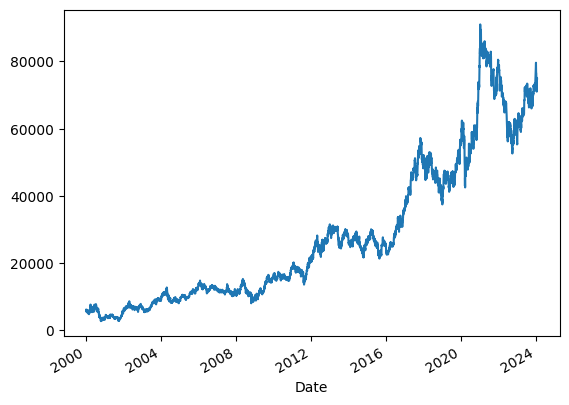

In [5]:
raw_data['Close'].plot()
plt.show()

In [6]:
data_test = raw_data.sort_values('Close')       #close 를 타켓데이터로 만들어준다
print(data_test.head())
print(data_test.tail())

              Open    High     Low   Close    Adj Close     Volume
Date                                                              
2000-10-18  2540.0  2760.0  2420.0  2730.0  2017.153198  164215000
2000-10-17  2980.0  3080.0  2730.0  2740.0  2024.541016   65300000
2000-10-30  2800.0  2880.0  2720.0  2750.0  2031.931030   36830000
2001-10-03  2810.0  2810.0  2810.0  2810.0  2076.263916          0
2001-10-02  2810.0  2810.0  2810.0  2810.0  2076.263916          0
               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2021-01-25  87000.0  89900.0  86300.0  89400.0  84769.570313  27258534
2021-01-13  89800.0  91200.0  89100.0  89700.0  85054.023438  36068848
2021-01-14  88700.0  90000.0  88700.0  89700.0  85054.023438  26393970
2021-01-12  90300.0  91400.0  87800.0  90600.0  85907.421875  48682416
2021-01-11  90000.0  96800.0  89500.0  91000.0  86286.710938  90306177


In [7]:
data_close=raw_data[['Close']]
print(data_close.head())

             Close
Date              
2000-01-04  6110.0
2000-01-05  5580.0
2000-01-06  5620.0
2000-01-07  5540.0
2000-01-10  5770.0


In [8]:
minmaxscaler = MinMaxScaler()                               #minmaxscale한다
scaled_data = minmaxscaler.fit_transform(data_close)
print(scaled_data[:])
print(scaled_data.shape)

[[0.03829161]
 [0.0322873 ]
 [0.03274046]
 ...
 [0.8153393 ]
 [0.81987085]
 [0.81760508]]
(6033, 1)


In [10]:
sequence_X = []
sequence_Y = []
for i in range(len(scaled_data)-30):
    x = scaled_data[i:i+30]
    y = scaled_data[i+30]
    sequence_X.append(x)
    sequence_Y.append(y)
print(sequence_X[:5])
print(sequence_Y[:5])

[array([[0.03829161],
       [0.0322873 ],
       [0.03274046],
       [0.03183415],
       [0.03443979],
       [0.03443979],
       [0.03387334],
       [0.03376005],
       [0.03511952],
       [0.03817832],
       [0.03817832],
       [0.03659227],
       [0.03749858],
       [0.03568596],
       [0.03364677],
       [0.03070126],
       [0.03115441],
       [0.03160757],
       [0.03500623],
       [0.0322873 ],
       [0.02934179],
       [0.02854877],
       [0.02718931],
       [0.02718931],
       [0.02843548],
       [0.03058797],
       [0.03387334],
       [0.0343265 ],
       [0.03364677],
       [0.03002152]]), array([[0.0322873 ],
       [0.03274046],
       [0.03183415],
       [0.03443979],
       [0.03443979],
       [0.03387334],
       [0.03376005],
       [0.03511952],
       [0.03817832],
       [0.03817832],
       [0.03659227],
       [0.03749858],
       [0.03568596],
       [0.03364677],
       [0.03070126],
       [0.03115441],
       [0.03160757],
       [0.

In [11]:
sequence_X = np.array(sequence_X)
sequence_Y = np.array(sequence_Y)
print(sequence_X[0])
print(sequence_Y[0])

[[0.03829161]
 [0.0322873 ]
 [0.03274046]
 [0.03183415]
 [0.03443979]
 [0.03443979]
 [0.03387334]
 [0.03376005]
 [0.03511952]
 [0.03817832]
 [0.03817832]
 [0.03659227]
 [0.03749858]
 [0.03568596]
 [0.03364677]
 [0.03070126]
 [0.03115441]
 [0.03160757]
 [0.03500623]
 [0.0322873 ]
 [0.02934179]
 [0.02854877]
 [0.02718931]
 [0.02718931]
 [0.02843548]
 [0.03058797]
 [0.03387334]
 [0.0343265 ]
 [0.03364677]
 [0.03002152]]
[0.02798233]


In [12]:
x_train,x_test,y_train,y_test = train_test_split(
    sequence_X,sequence_Y,test_size=0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(4802, 30, 1) (4802, 1)
(1201, 30, 1) (1201, 1)


In [13]:
model = Sequential()
model.add(LSTM(50,input_shape=(30,1),activation='tanh'))    #LSTM  activation=탄젠트로 준다
model.add(Flatten())
model.add(Dense(1))     #activation을 주지 않는다
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(loss='mse',optimizer = 'adam')
fit_hist = model.fit(x_train,y_train,epochs=100, validation_data=(x_test,y_test))

Epoch 1/100
151/151 [==============================] - 8s 34ms/step - loss: 0.0078 - val_loss: 2.2825e-04
Epoch 2/100
151/151 [==============================] - 2s 16ms/step - loss: 2.0557e-04 - val_loss: 1.9285e-04
Epoch 3/100
151/151 [==============================] - 3s 17ms/step - loss: 1.8545e-04 - val_loss: 1.6981e-04
Epoch 4/100
151/151 [==============================] - 3s 18ms/step - loss: 1.8121e-04 - val_loss: 1.7366e-04
Epoch 5/100
151/151 [==============================] - 3s 18ms/step - loss: 1.7817e-04 - val_loss: 2.0865e-04
Epoch 6/100
151/151 [==============================] - 4s 25ms/step - loss: 1.7413e-04 - val_loss: 2.5163e-04
Epoch 7/100
151/151 [==============================] - 3s 21ms/step - loss: 1.6896e-04 - val_loss: 2.7958e-04
Epoch 8/100
151/151 [==============================] - 2s 16ms/step - loss: 1.6340e-04 - val_loss: 2.8866e-04
Epoch 9/100
151/151 [==============================] - 3s 17ms/step - loss: 1.5776e-04 - val_loss: 2.8537e-04
Epoch 10/100
1

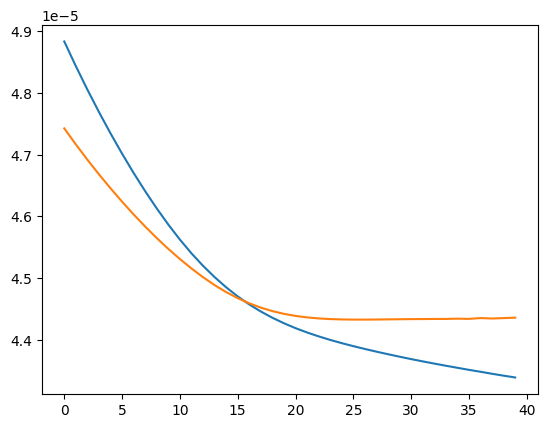

In [17]:
plt.plot(fit_hist.history['loss'][60:],label='loss')
plt.plot(fit_hist.history['val_loss'][60:],label='val_loss')

In [19]:
score = model.evaluate(x_test,y_test,verbose=0)
print(score)

4.436503877514042e-05


In [20]:
pred = model.predict(x_test)

38/38 [==============================] - 1s 8ms/step


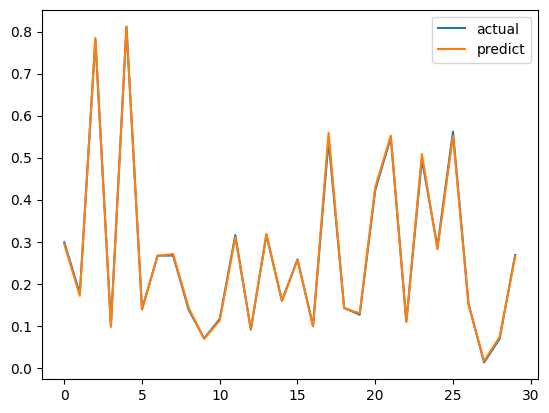

In [22]:
plt.plot(y_test[:30],label='actual')
plt.plot(pred[:30],label='predict')
plt.legend()
plt.show()

In [23]:
last_data_30 = scaled_data[-30:].reshape(1,30,1)
today_close = model.predict(last_data_30)
print(today_close)

1/1 [==============================] - 0s 29ms/step
[[0.8184607]]


In [24]:
today_close_won = minmaxscaler.inverse_transform(today_close)
print('%d 원'%today_close_won[0][0])

74975 원
